# Cellular automata code

## Cellular automata in a nutshell

A cellular automaton is a discrete model studied in computer science, mathematics, physics, complexity science, theoretical biology and microstructure modeling. 

<img src="./images/Gospers_glider_gun.gif" width="200"/>

- A cellular automaton consists of a regular grid of cells, each in one of a finite number of states, such as on and off. 
- For each cell, a set of cells called its neighborhood is defined relative to the specified cell. 
- An initial state (time t = 0) is selected by assigning a state for each cell. 
- A new generation is created (advancing t by 1), according to some fixed rule (generally, a mathematical function) that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. 
- Typically, the rule for updating the state of cells is the same for each cell and does not change over time, and is applied to the whole grid simultaneously.

For more information see https://en.wikipedia.org/wiki/Cellular_automaton.

A more in depth introduction with hints how to solve the task is given in https://natureofcode.com/book/chapter-7-cellular-automata/

## Example: 1-dim cellular automaton
Build and simulate the simple cellular automaton with the following characteristics:

- **Grid**: We will use the simplest possible grid, which is one-dimensional: a line of cells.
- **States**: The simplest set of states (beyond having only one state) are the two possible states per cell: 0 or 1.
- **Neighborhood**: The simplest neighborhood in one dimension for any given cell would be the cell itself and its two adjacent neighbors: one to the left and one to the right.
- **Rules**: Define how a cell is updated based on its neighborhood. The simplest rules are identical rules for every cell.

For the update rules we need to define an outcome (new state value 0 or 1) for a cell based on its current neighborhood.
The following rules are applied:

```
neighborhood (with cell in the center) -> new state of cell
000 -> 0
001 -> 1
010 -> 0
011 -> 1
100 -> 1
101 -> 0
110 -> 1
111 -> 0
```
- the one dimensional grid contains `101` cells
- the initial state of all cells is 0, with exception of the cell in the middle of the grid which starts with state 1

#### Cellular automaton as a special boolean network
- reuse our simulator

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint

def ndsimulate(x0, f_rules, steps=10):
    """ Simulates the boolean network from initial state by applying given rules."""
    states = np.zeros(shape=((steps+1), x0.size), dtype=bool)
    
    print("-" * 40)
    pprint("x0 = {}".format(x0.astype(np.int)))
    states[0, :] = x0
    for k in range(steps):
        x = states[k]
        states[k+1, :] = f_rules(states[k, :])
        
    # pprint(states.astype(np.int))
    return states

def plot_states(states, figsize=(5,3), ylabel="time step"):
    """Plot the states."""
    Nt, Nx = states.shape
    fig = plt.figure(figsize=figsize)
    plt.imshow(states.astype(np.double), cmap="binary")
    # plt.colorbar()
    plt.ylabel(ylabel)
    plt.xlabel("state")
    ax = plt.gca()
    ax.set_xticks(range(Nx))
    #ax.set_xticklabels(['x{}'.format(k) for k in range(Nx)])
    ax.set_xticklabels([''.format(k) for k in range(Nx)])
    plt.show()
    return fig

----------------------------------------
('x0 = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 '
 '0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')


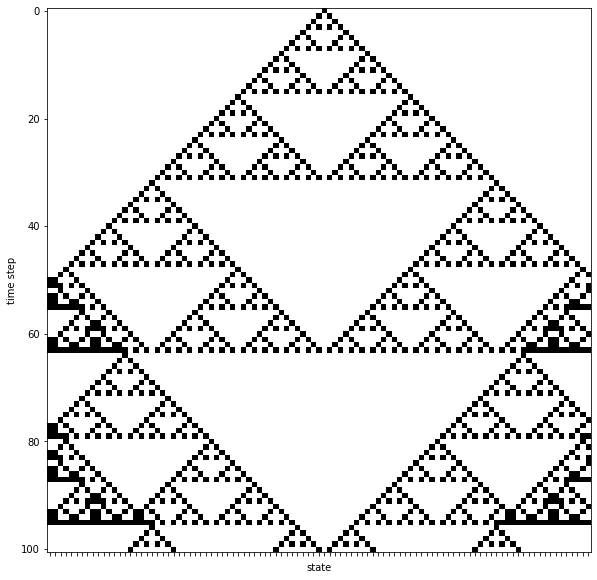

In [16]:
def f_automaton(x):
    """ New state based on neighborhood (cell in center)
    000 -> 0  [0]
    001 -> 1  [1]
    010 -> 0  [2]
    011 -> 1  [3]
    100 -> 1  [4]
    101 -> 0  [5]
    110 -> 1  [6]
    111 -> 0  [7]
    """
    Nx = x.size
    y = np.zeros_like(x)
    for k in range(Nx):
        
        s = np.zeros(shape=(3,))
        # get the neighborhood
        if k==0:
            s[0] = x[-1]
            s[1] = x[0]
            s[2] = x[1]
        elif k==(Nx-1):
            s[0] = x[Nx-2]
            s[1] = x[Nx-1]
            s[2] = x[0]
        else:
            s = x[(k-1):(k+2)]
    
        s = ''.join(s.astype(np.uint8).astype(str))
    
        # update based on neighborhood
        if s == '000':
            y[k] = 0
        elif s == '001':
            y[k] = 1
        elif s == '010':
            y[k] = 0
        elif s == '011':
            y[k] = 1
        elif s == '100':
            y[k] = 1
        elif s == '101':
            y[k] = 0
        elif s == '110':
            y[k] = 1
        elif s == '111':
            y[k] = 0
    return y

# initial condition
Nx = 101  # 101
x0 = np.zeros(Nx, dtype=bool)
x0[int((Nx-1)/2 + 1)] = 1

states = ndsimulate(x0, f_rules=f_automaton, steps=100)
f = plot_states(states, figsize=(10,10))
f.savefig("./images/cellular_automaton.png", dpi=150, bbox_inches="tight")

#### Create animation
In the following we animate the cellular automaton over time.
Let the Game of Life begin.

In [17]:
# Create animation
Nt, Nx = states.shape
filenames = []
for k in range(Nt):
    filename = "./results/automaton/a_{:04}.png".format(k)
    # print(filename)
    
    fig = plt.figure(figsize=(10,4))
    data = states[k,:].astype(np.double)
    data = data.reshape((1, Nx))
    
    plt.imshow(data, cmap="binary")
    plt.title("time: {}".format(k))
    # plt.ylabel("time: {}".format(k))
    # plt.xlabel("state")
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    fig.savefig(filename, bbox_inches="tight")
    plt.close()
    filenames.append(filename)

In [18]:
import imageio

def create_gif(output_file, filenames, duration):
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave(output_file, images, duration=duration)

create_gif('./images/automaton.gif', filenames, duration=0.2)

<img src="./images/automaton.gif" width="1000"/>